# Ground Combat Systems Contract Analysis (GCSCA)

## Introduction

This notebook analyzes Department of Defense (DoD) contract data for three major ground combat systems (GCS) programs: the Abrams tank, Bradley fighting vehicle, and Stryker armored personnel carrier. The analysis spans fiscal years 2016-2020 and aims to identify spending trends, key vendors, contracting patterns, and program lifecycle stages.

The notebook is structured in three phases:
1. **Data Exploration and Cleaning**: Understanding the dataset structure and preparing it for analysis
2. **Exploratory Data Analysis**: Examining spending patterns, vendor relationships, and geographic distribution
3. **Advanced Analysis**: Examining technology acquisition patterns, program lifecycle assessment, and risk evaluation

This notebook uses functions from the accompanying `utils.py` file to maintain code organization and readability.

## Phase 1: Data Exploration and Cleaning

Phase 1 focuses on exploring the dataset, understanding its structure, cleaning the data, and preparing it for further analysis. This includes examining data types, handling missing values, normalizing vendor names, and categorizing contracts by program.

### 1.1 Setting up the Environment

First, we import the necessary libraries and set the visualization style to ensure consistent presentation throughout the notebook.

In [1]:
import utils
import pandas as pd

colors = utils.set_visualization_style()

### 1.2 Loading and Initial Data Exploration

This section loads the dataset and performs initial exploration to understand its structure, data types, and identify potential issues that need to be addressed in the cleaning process. We also standardize column names to lowercase with underscores for consistency.

In [2]:
df = utils.load_data("data/ground_vehicles.xlsx")
df = utils.standardize_column_names(df)

Dataset shape: (54379, 14)

Data types:
ID                              int64
Contract Number (IDVPIID)      object
Award Number (PIID)            object
Modification Number            object
Fiscal Year                     int64
Title                          object
Awarded Amount                float64
Contracting Office             object
Contracting Agency             object
Place of Performance State     object
Place of Performance City      object
Vendor  Name                   object
Vendor  Top Name               object
PSC Name                       object
dtype: object

Summary statistics:
                 ID   Fiscal Year  Awarded Amount
count  5.437900e+04  54379.000000    5.308100e+04
mean   4.514616e+08   2018.041983    5.418603e+05
std    1.532453e+08      1.612579    1.281868e+07
min    2.619012e+08   2016.000000   -4.170755e+08
25%    2.991626e+08   2017.000000    1.229180e+03
50%    4.629981e+08   2018.000000    6.021000e+03
75%    5.998319e+08   2019.000000    1.1001

### 1.3 Exploring Data Distribution

Here we examine the distribution of key variables in the dataset, particularly focusing on fiscal years and award amounts. We create visualizations to better understand patterns in the data and identify potential outliers or anomalies.


Unique values in fiscal_year: 6
fiscal_year
2017    12384
2016    11462
2018    10449
2019     7909
2020     6843
2021     5332
Name: count, dtype: int64

Unique values in contracting_office: 620

Unique values in contracting_agency: 80

Unique values in place_of_performance_state: 53

Unique values in place_of_performance_city: 751

Unique values in vendor_name: 1131

Unique values in vendor_top_name: 1034

Unique values in psc_name: 523


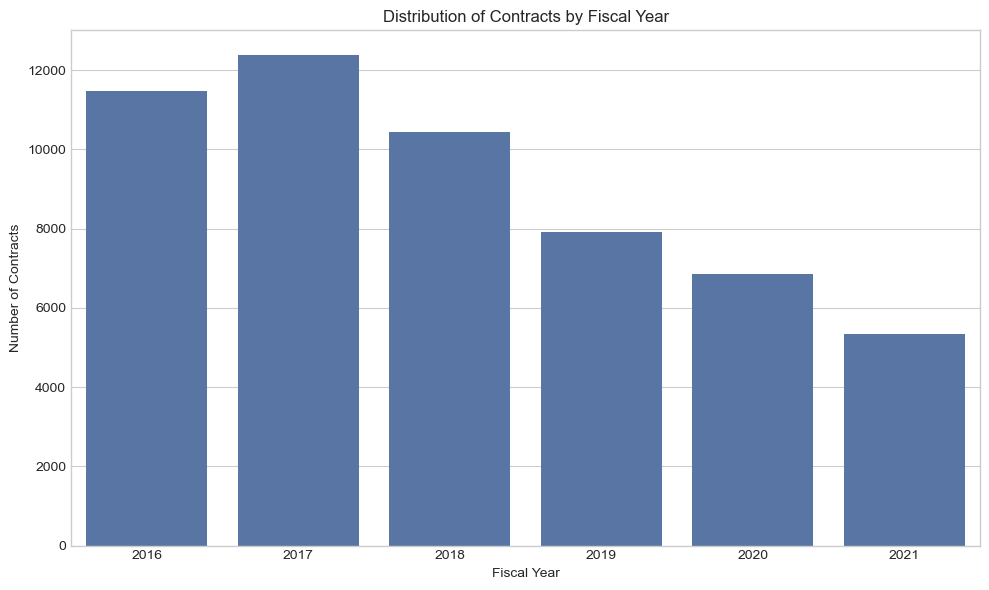

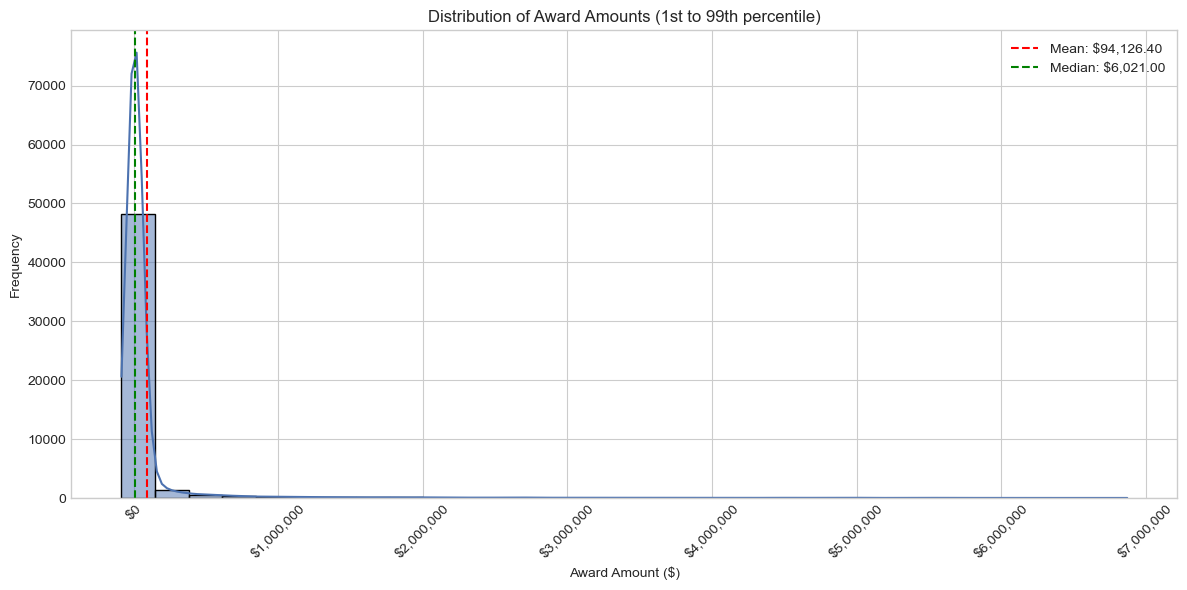

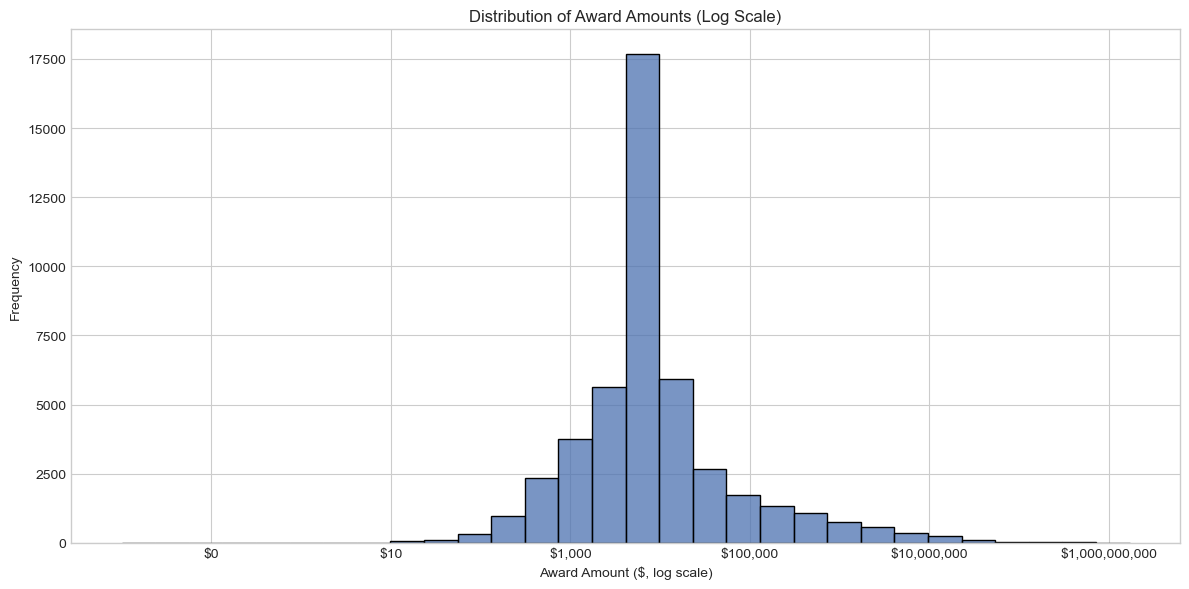

In [3]:
categorical_cols = ['fiscal_year', 'contracting_office', 'contracting_agency', 
                    'place_of_performance_state', 'place_of_performance_city', 
                    'vendor_name', 'vendor_top_name', 'psc_name']

utils.explore_categorical_distributions(df, categorical_cols)
utils.plot_fiscal_year_distribution(df)
utils.plot_award_amount_distribution(df)

### 1.4 Analyzing Contract Types and Programs

This section identifies which contracts are associated with each of the three ground combat systems (Abrams, Bradley, and Stryker). We classify contracts based on keywords in their titles, taking care to distinguish Stryker combat vehicles from Stryker medical equipment.


Contracts by Program:
program
Unknown    48613
Stryker     4495
Abrams       980
Bradley      291
Name: count, dtype: int64


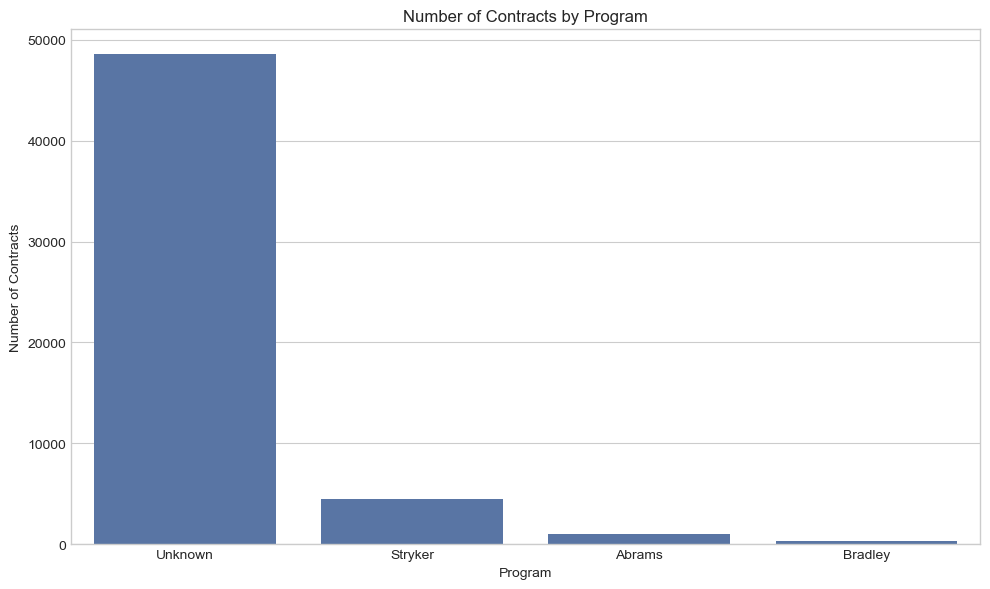


Found 48613 contracts with unidentified programs.
Sample of unidentified contracts:
                                                title  awarded_amount
0                                 BEARING,PLAIN,SPHER             NaN
1   PREVENTATIVE MAINTENANCE SERVICES ON NEPTUNE U...        25990.00
3   IGF::OT::IGF MAINTENANCE OF PATIENT BEDS OPTIO...        16356.00
4   IGF::OT::IGF MAINTENANCE OF STRYKER NAV II SYSTEM        68023.62
6   IGF::OT::IGF OPTION YEAR FOUR (4) PMI SURGICAL...        26797.50
7   IGF::CT::IGF::MAINTENANCE OF NEPTUNE DETERGENT...        32340.00
8               IGF::OT::IGF PM FOR NEPTUNE EQUIPMENT        13387.50
9   IGF::OT::IGF ENDOSCOPY SERVICES/MAINT FOR VA M...        91800.00
10                                         TOTAL KNEE         4414.52
11              IGF::OT::IGF PM AND SVC FOR MED EQUIP         9000.00


In [4]:
df = utils.categorize_programs(df)

### 1.5 Vendor Name Normalization

Vendor name normalization is critical for accurate analysis as the same vendor may appear under different spellings or formats. This section implements a sophisticated approach using fuzzy matching to standardize vendor names, which helps identify the true market concentration and key vendors in the dataset.

In [5]:
df, unique_vendors, unique_normalized_vendors = utils.normalize_vendor_names(df)


Total unique vendor names before normalization: 1131
Unique vendor names after basic cleaning: 1113
Unique vendor names after normalization: 1099

Top 10 vendors before normalization:
vendor_name
Howmedica Osteonics Corp.              32953
Beacon Point Associates LLC             2806
Stryker Corporation                     2252
Physio-Control, Inc.                    1608
General Dynamics Land Systems Inc.      1204
Stryker Sales, LLC                      1076
Oshkosh Corporation                      591
Bae Systems Land & Armaments L.P.        546
Trillamed, LLC                           388
Abrams Airborne Manufacturing, Inc.      386
Name: count, dtype: int64

Top 10 vendors after normalization:
normalized_vendor_name
howmedica osteonics corp         32953
beacon point associates           2806
stryker                           2252
physio-control                    1656
general dynamics land systems     1208
stryker sales                     1076
oshkosh                          

### 1.6 Data Type Handling and Missing Values

This section addresses data quality issues by ensuring appropriate data types and handling missing values. Different strategies are applied based on the column type: categorical columns use 'Unknown' as a fill value, while numerical columns use either zero (for award amounts) or the median value.

In [6]:
df = utils.clean_data_types_and_missing_values(df)

Column contract_number_idvpiid has 14277 missing values.
Column award_number_piid has 125 missing values.
Column modification_number has 1484 missing values.
Column title has 3 missing values.
Column awarded_amount has 1298 missing values.
Column place_of_performance_state has 2372 missing values.
Column place_of_performance_city has 2372 missing values.
Column psc_name has 748 missing values.

Missing values after handling:
id                            0
contract_number_idvpiid       0
award_number_piid             0
modification_number           0
fiscal_year                   0
title                         0
awarded_amount                0
contracting_office            0
contracting_agency            0
place_of_performance_state    0
place_of_performance_city     0
vendor_name                   0
vendor_top_name               0
psc_name                      0
program                       0
cleaned_vendor_name           0
normalized_vendor_name        0
dtype: int64


### 1.7 Summary of Data Cleaning Results

This final section of Phase 1 summarizes the data cleaning process, providing metrics on the changes made and saving the cleaned dataset for further analysis. The cleaned data will be used in Phase 2 to perform more in-depth analysis of spending patterns, vendors, and program lifecycles.

In [7]:
print(f"Final dataset shape: {df.shape}")
print(f"\nNormalized {len(unique_vendors)} vendor names to {len(unique_normalized_vendors)} unique vendors.")

unknown_contracts = df[df['program'] == 'Unknown']
print(f"Identified programs for {len(df) - len(unknown_contracts)} out of {len(df)} contracts.")

cleaned_file_path = "data/cleaned_ground_vehicles.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")

Final dataset shape: (54379, 17)

Normalized 1131 vendor names to 1099 unique vendors.
Identified programs for 5766 out of 54379 contracts.

Cleaned data saved to data/cleaned_ground_vehicles.csv


## Phase 2: Exploratory Data Analysis

Phase 2 explores the cleaned dataset to uncover patterns, relationships, and insights about the ground combat systems contracts. We'll analyze spending by program, vendor concentration, geographic distribution, and contracting office activities.

### 2.1 Loading the Cleaned Data and Initial Setup

We start by loading the cleaned data from Phase 1 and setting up visualization parameters for consistent and informative displays throughout the analysis.

In [8]:
df = pd.read_csv('data/cleaned_ground_vehicles.csv')
program_df = df[df['program'] != 'Unknown'].copy()

print(f"Dataset shape: {df.shape}")
print(f"Date range: FY{df['fiscal_year'].min()} to FY{df['fiscal_year'].max()}")
print(f"Total programs analyzed: {df['program'].nunique()-1 if 'Unknown' in df['program'].unique() else df['program'].nunique()}")

Dataset shape: (54379, 17)
Date range: FY2016 to FY2021
Total programs analyzed: 3


### 2.2 Program-Level Analysis

This section examines spending patterns across the three ground combat systems programs (Abrams, Bradley, and Stryker) over time. We calculate total spending by program and fiscal year, analyze trends, and compare spending distribution to identify budget prioritization among programs.

Total spending by program and fiscal year (in millions of dollars):
program         Abrams   Bradley   Stryker
fiscal_year                               
2016          $232.29M   $88.54M  $342.22M
2017          $477.59M   $27.76M  $366.51M
2018         $1852.58M  $264.61M  $451.74M
2019         $1663.43M  $263.34M  $495.70M
2020         $1487.27M  $193.39M   $87.38M
2021          $613.51M   $45.05M  $202.29M

Total spending by program (FY2016-2021):
Abrams: $6,326,673,719.56 ($6326.67M)
Stryker: $1,945,848,555.83 ($1945.85M)
Bradley: $882,691,875.06 ($882.69M)


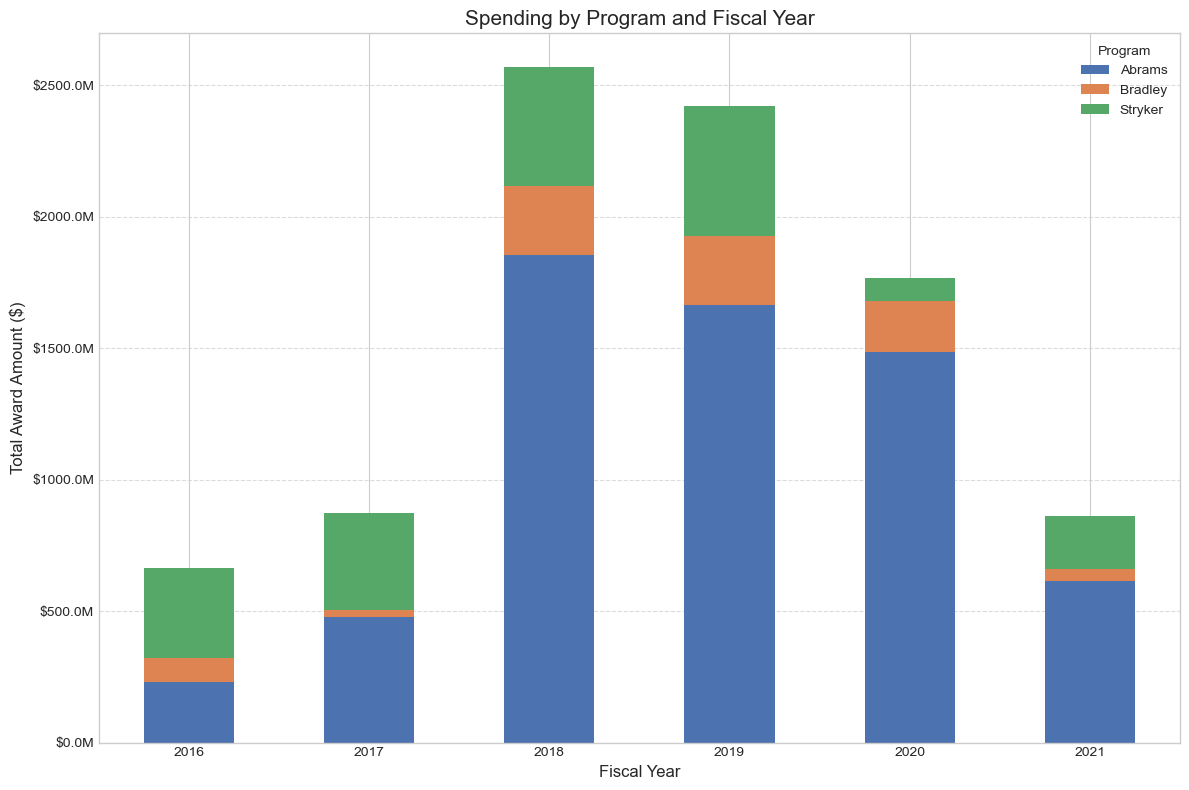

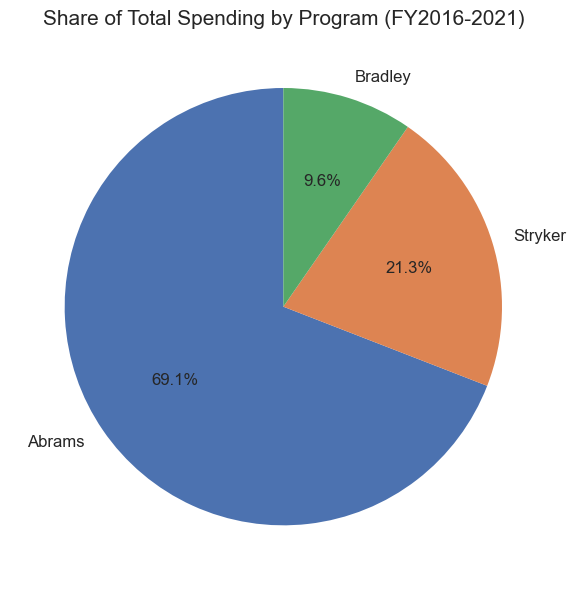

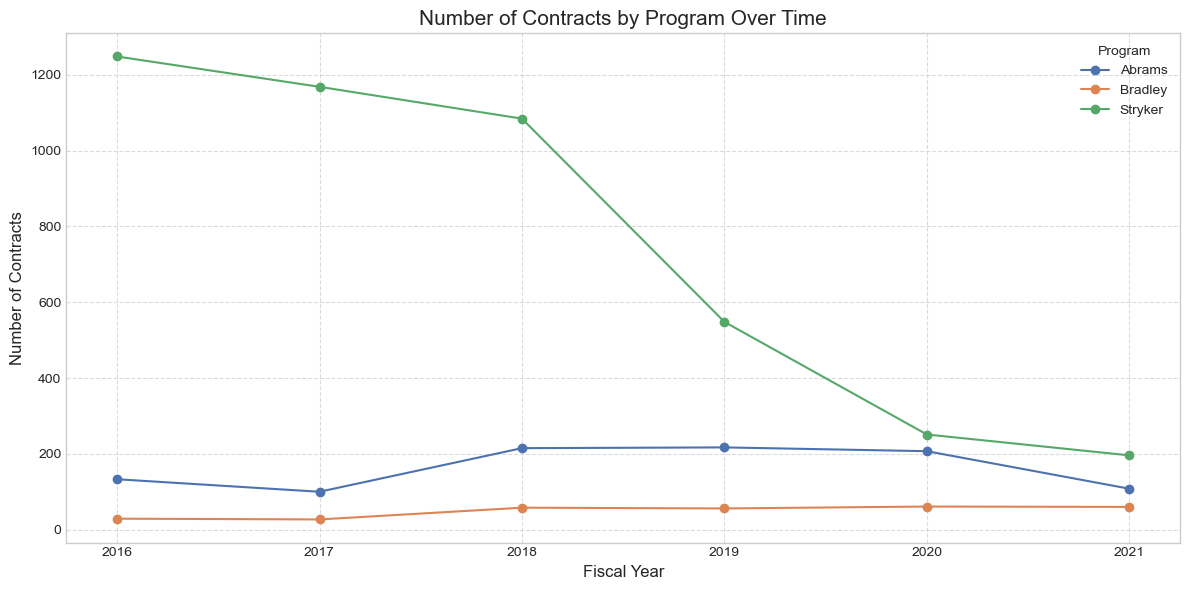

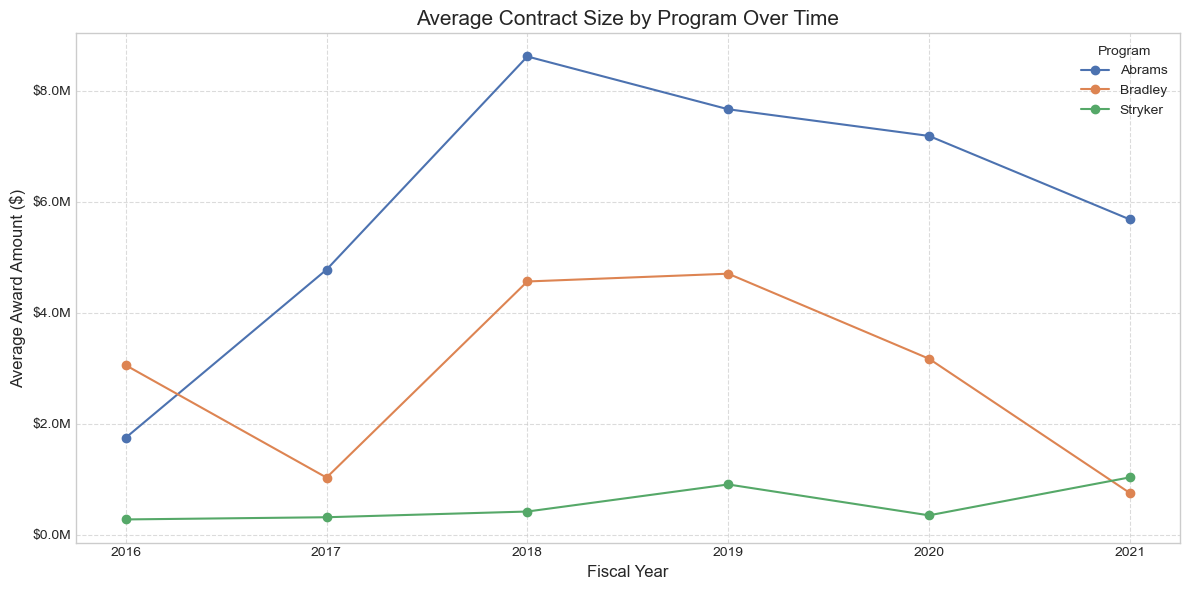

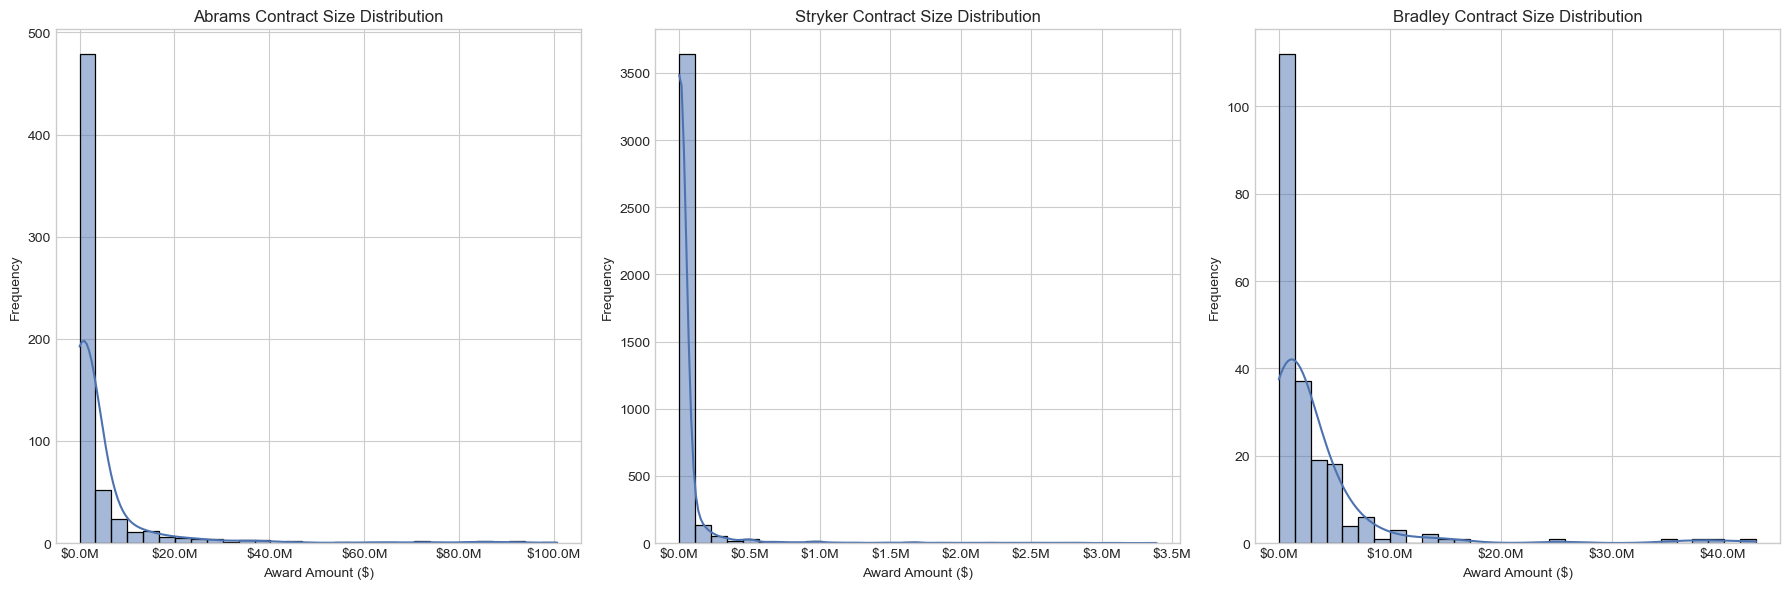

In [9]:
yearly_program_spend, total_by_program = utils.analyze_program_spending(program_df)
utils.visualize_program_spending(yearly_program_spend, total_by_program, colors)

contract_counts, avg_contract_size = utils.analyze_contract_trends(program_df)
utils.analyze_contract_size_distribution(program_df, total_by_program)

### 2.3 Vendor Analysis

This section examines vendor relationships and market concentration within each program. We identify top vendors by award amount, analyze market concentration metrics, and highlight vendors that work across multiple programs. This helps assess competitiveness and potential single-source dependencies.


Top 10 vendors for Abrams program:
normalized_vendor_name
general dynamics land systems     $4,891,364,688.35
systems drs sustainment             $306,593,002.22
raytheon                            $238,730,270.66
allison transmission                $214,817,143.62
honeywell international             $129,804,837.39
drs network imaging systems         $109,129,440.80
kongsberg defence aerospace as       $86,653,801.66
lockheed martin                      $51,401,660.71
canadian commercial                  $47,608,542.14
contitech usa                        $23,952,885.80
Name: awarded_amount, dtype: object

Top 10 vendors for Bradley program:
normalized_vendor_name
bae systems land armaments     $612,635,392.13
l3 technologies                $139,233,125.00
loc performance products        $74,124,702.81
cummins                         $17,438,574.09
drs network imaging systems     $12,719,178.42
ssi technology                   $5,081,320.23
aaski technology                 $3,366,228

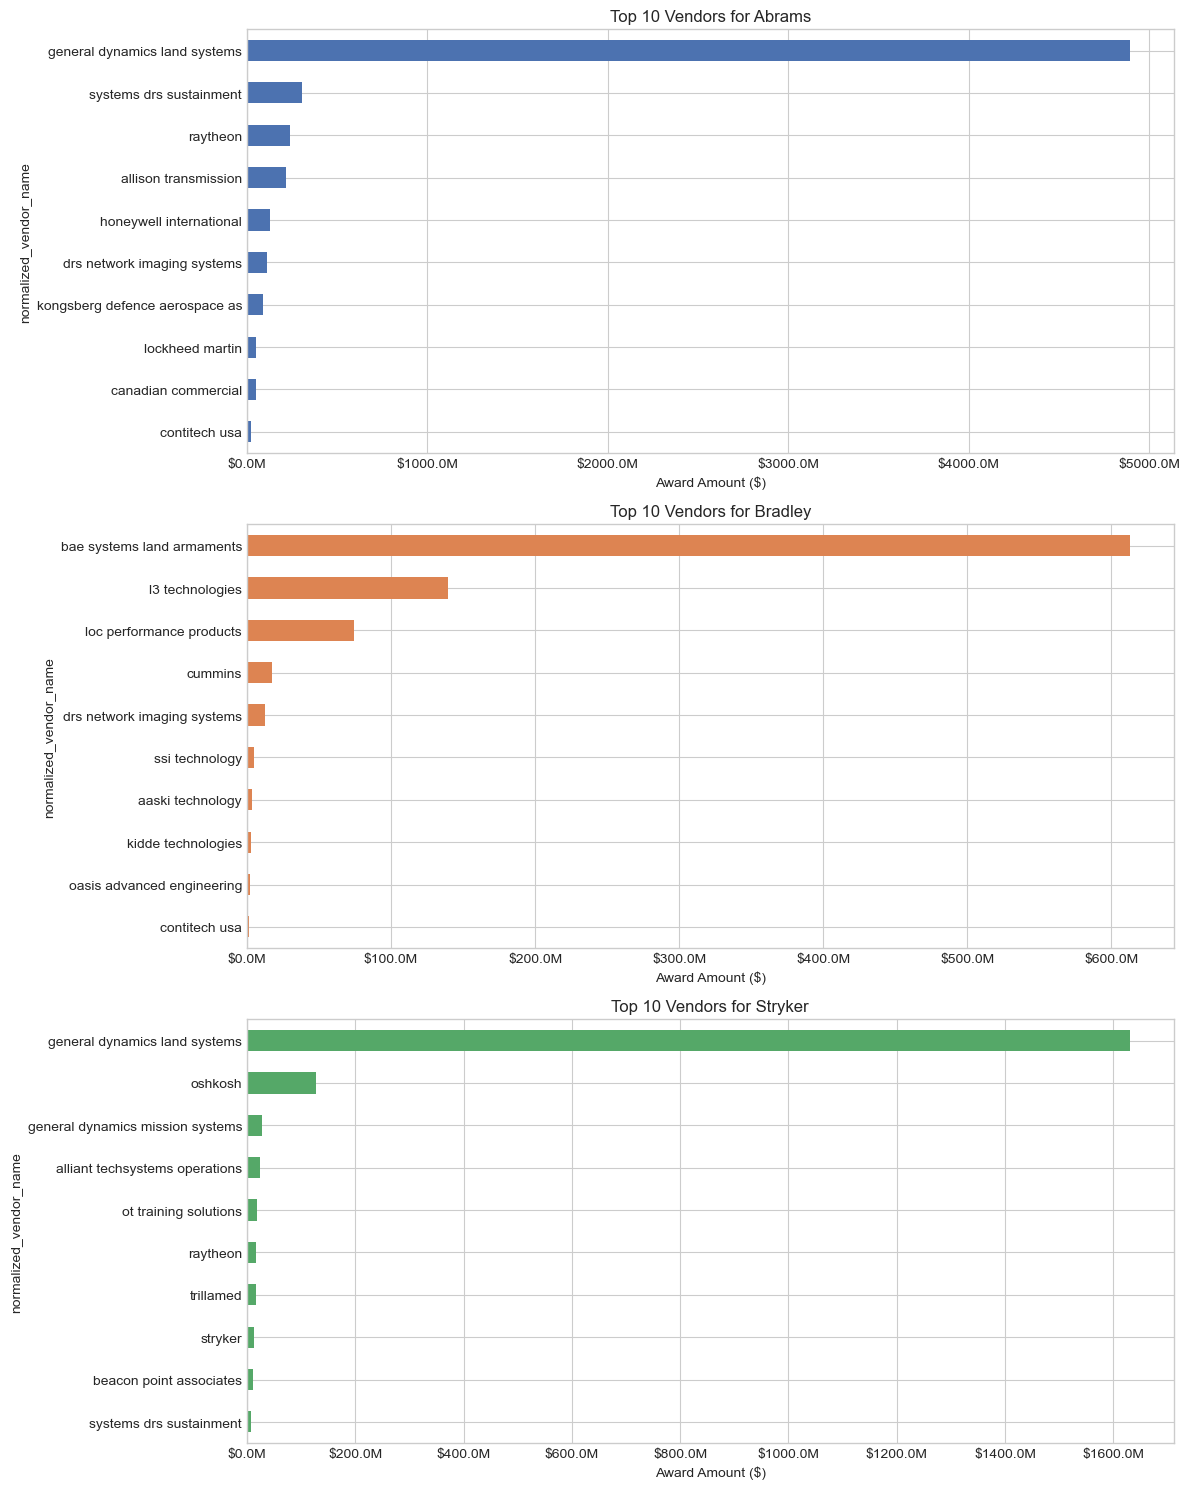

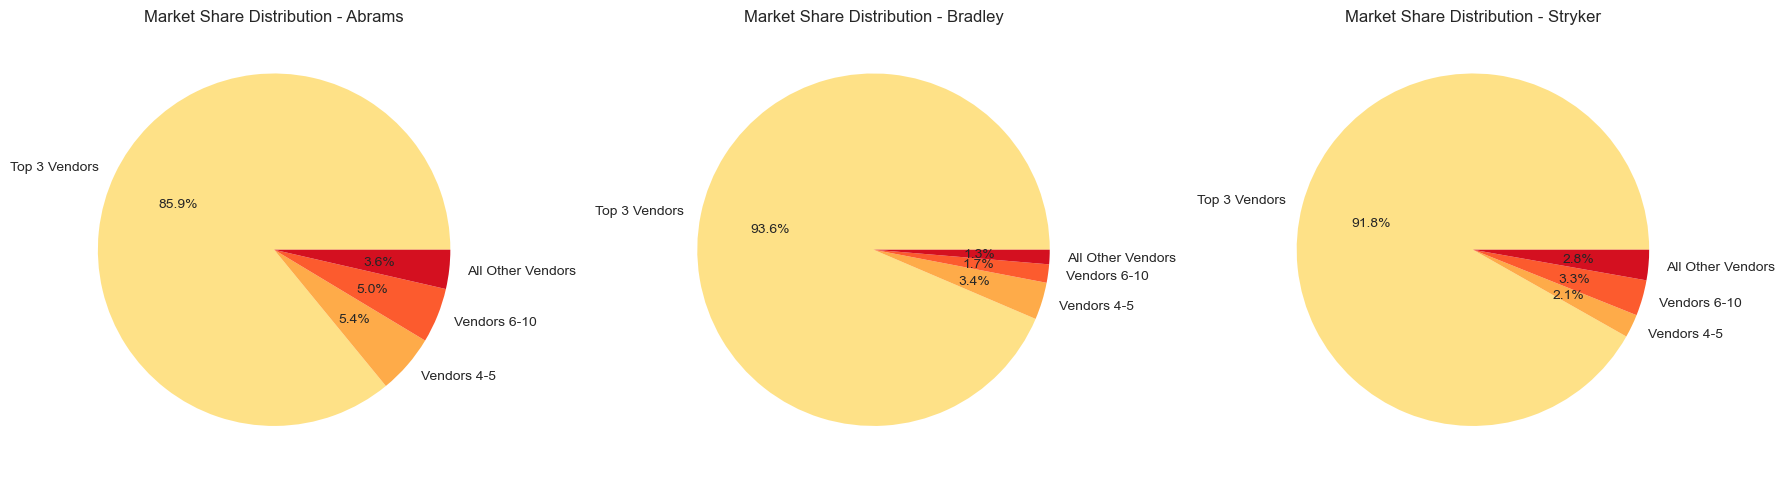

In [10]:
top_vendors_by_program, market_concentration = utils.analyze_vendor_concentration(program_df)
cross_program_vendors, top_cross_program_vendors = utils.analyze_cross_program_vendors(program_df)
utils.visualize_vendor_concentration(top_vendors_by_program, market_concentration, colors)

### 2.4 Geographic Analysis

This section analyzes the geographic distribution of contract spending, identifying key regions that benefit from the ground combat systems programs. Understanding the geographic footprint helps assess economic impact and potential supply chain considerations.

Top 10 states by total contract value (across all programs):
program                        Abrams   Bradley    Stryker      Total
place_of_performance_state                                           
MI                          $4690.73M  $215.35M  $1632.84M  $6538.93M
CA                            $45.66M  $386.34M    $17.68M   $449.68M
FL                           $265.55M   $12.72M    $38.13M   $316.40M
MO                           $308.41M    $0.00M     $7.95M   $316.36M
PA                            $87.60M  $221.35M     $2.95M   $311.90M
TX                           $228.39M    $0.10M     $7.09M   $235.58M
IN                           $214.83M   $16.60M     $0.21M   $231.65M
AZ                           $129.56M    $0.00M    $31.23M   $160.80M
WI                             $0.30M    $0.55M   $128.39M   $129.25M
OH                            $35.89M    $1.76M     $1.69M    $39.34M

Top 10 states by contract count (across all programs):
program                     Abrams  Bradley

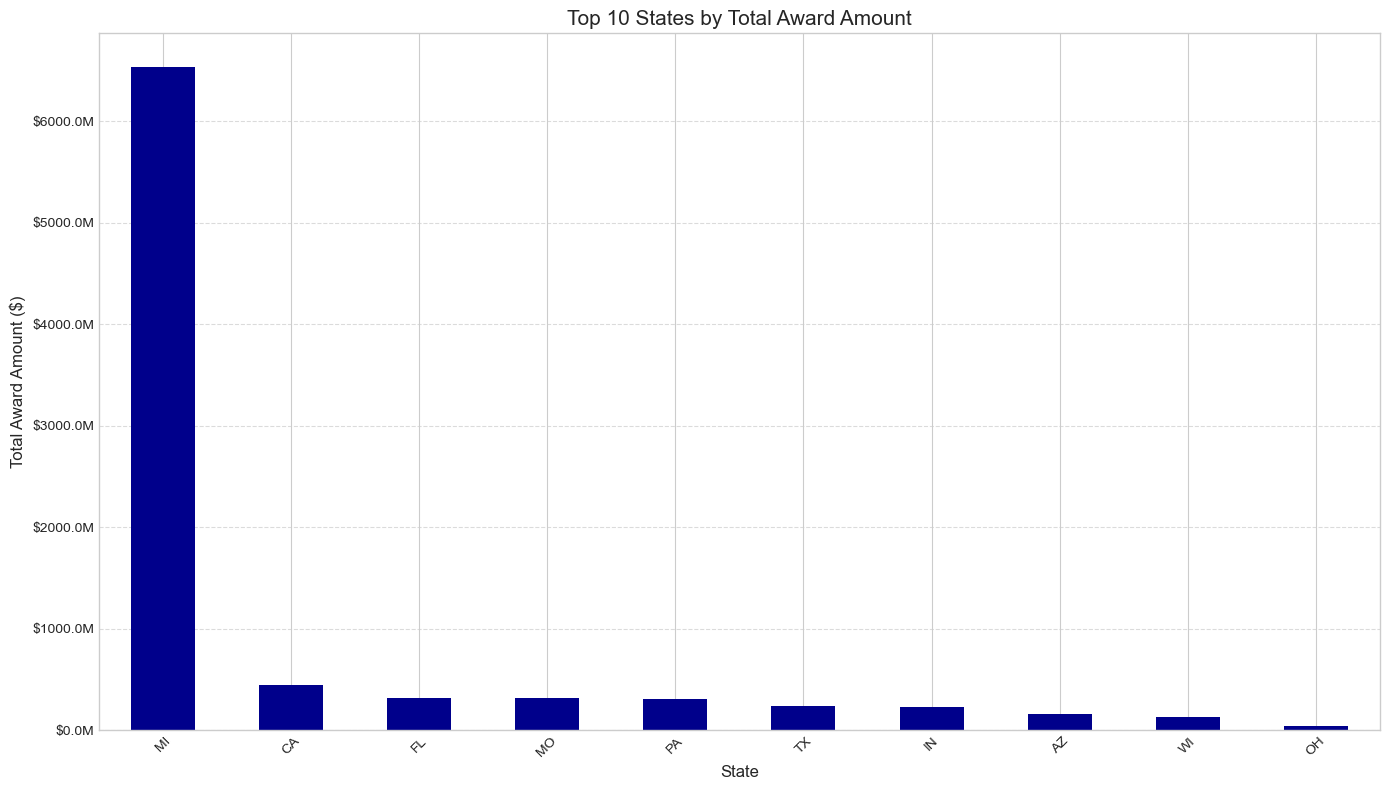

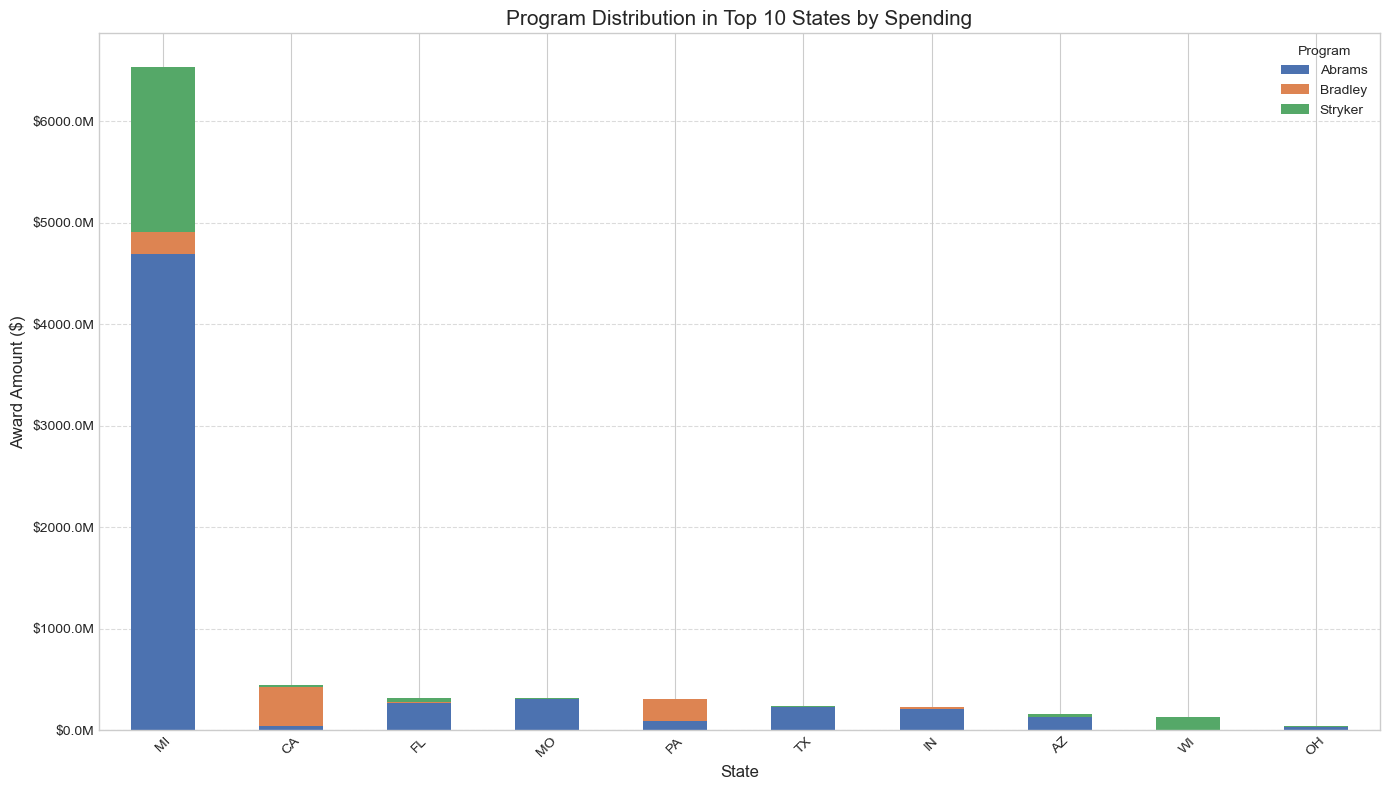


Top 10 cities by total contract value (across all programs):
program                  Abrams   Bradley    Stryker      Total
location                                                       
Sterling Heights, MI  $4672.77M    $0.00M  $1616.14M  $6288.91M
San Jose, CA             $0.00M  $370.60M     $1.69M   $372.29M
Saint Louis, MO        $307.85M    $0.00M     $7.67M   $315.52M
McKinney, TX           $225.76M    $0.00M     $3.69M   $229.44M
York, PA                 $0.00M  $221.35M     $0.00M   $221.35M
Indianapolis, IN       $214.82M    $0.00M     $0.19M   $215.00M
Muskegon, MI             $0.00M  $139.23M     $0.00M   $139.23M
Oshkosh, WI              $0.00M    $0.00M   $128.29M   $128.29M
Melbourne, FL          $101.15M   $12.72M     $0.00M   $113.87M
Phoenix, AZ             $97.46M    $0.00M     $0.66M    $98.13M


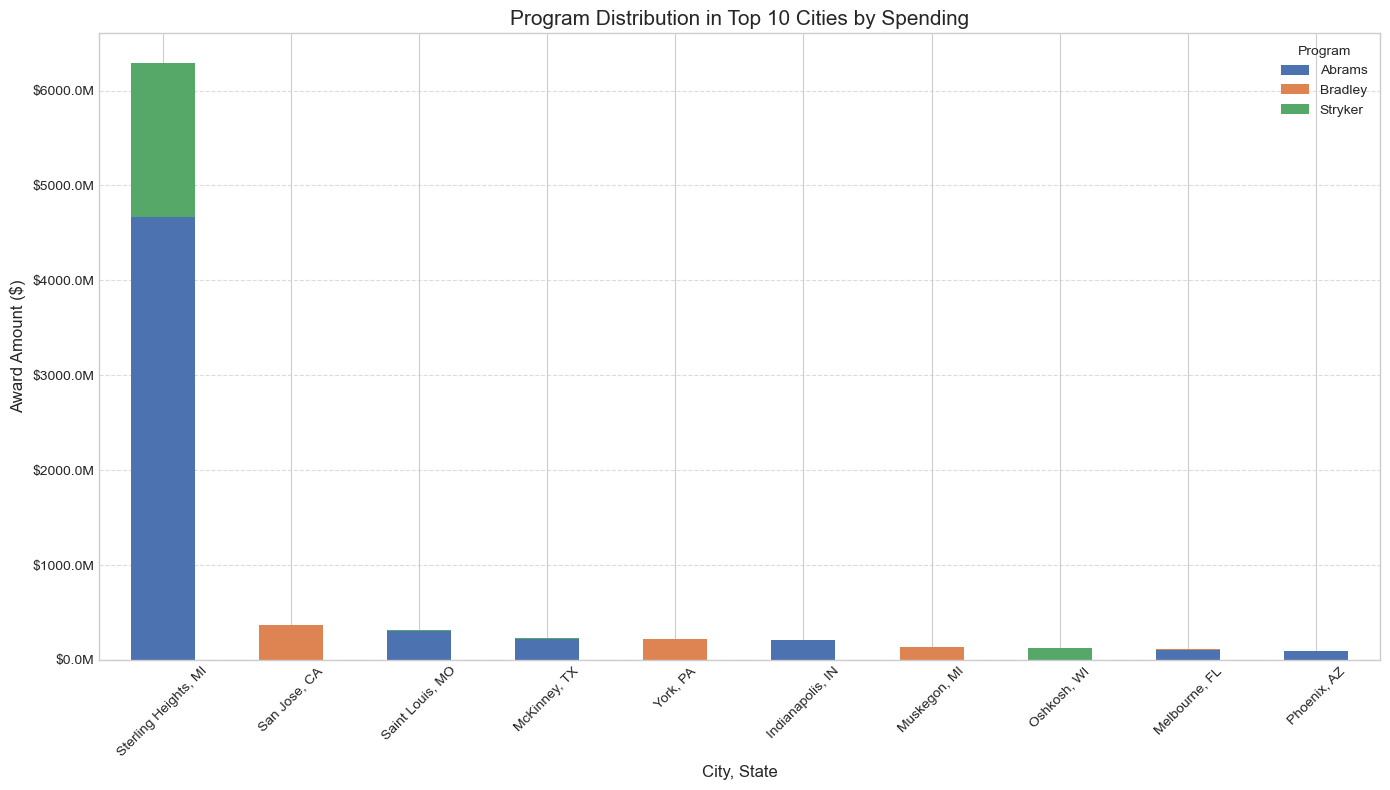

In [11]:
geo_df, state_pivot_sorted, state_counts_sorted = utils.analyze_geographic_distribution(program_df)
utils.visualize_geographic_distribution(state_pivot_sorted, colors)

city_pivot_sorted = utils.analyze_city_distribution(geo_df)
utils.visualize_city_distribution(city_pivot_sorted, colors)

### 2.5 Contracting Office/Agency Analysis

This section examines which government offices and agencies are responsible for managing the ground combat systems contracts. We identify the primary contracting offices, their spending patterns, and assess potential contracting efficiency through metrics like average contract size and modification frequency.

Top 10 contracting offices by total contract value:
program                                                Abrams   Bradley  \
contracting_office                                                        
0646 AQ TM     CONTRACTING TEA - APO                $5147.69M  $772.25M   
US Department of the Army                            $289.30M   $87.62M   
DLA Land - Warren                                    $358.27M   $13.24M   
ACC-APG Aberdeen - Division C                        $285.22M    $0.00M   
ACC-APG Orlando, FL                                  $100.98M    $2.18M   
ACC New Jersey Contracting Center (ACC-PICA)          $89.89M    $0.00M   
ACC Contracting Centers                                $5.54M    $3.37M   
ACC Aberdeen Proving Ground Contracting Center ...    $17.30M    $0.21M   
PBS Rocky Mountain (Region 8)                          $0.00M    $0.00M   
Defense Microelectronics Activity (DMEA) (forme...     $0.54M    $0.00M   

program                                        

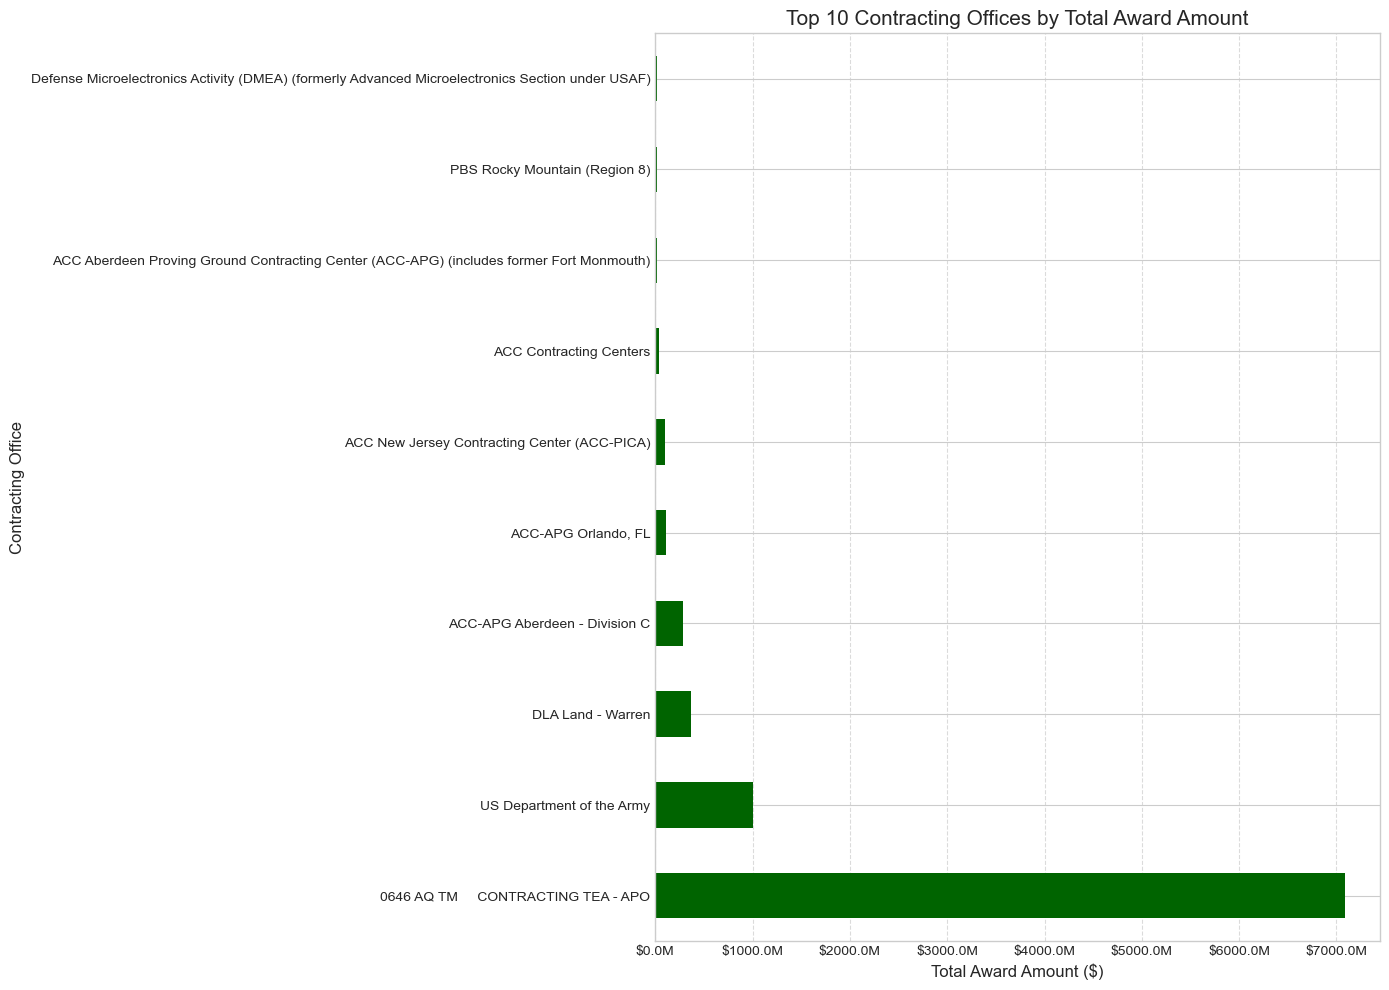


Contracting office metrics (top 10 by spending):
                                                    Contract Count  \
contracting_office                                                   
0646 AQ TM     CONTRACTING TEA - APO                          1041   
US Department of the Army                                      142   
DLA Land - Warren                                              214   
ACC-APG Aberdeen - Division C                                   20   
ACC-APG Orlando, FL                                            117   
ACC New Jersey Contracting Center (ACC-PICA)                    26   
ACC Contracting Centers                                         13   
ACC Aberdeen Proving Ground Contracting Center ...              22   
PBS Rocky Mountain (Region 8)                                    3   
Defense Microelectronics Activity (DMEA) (forme...              10   

                                                    Programs Managed  \
contracting_office                   

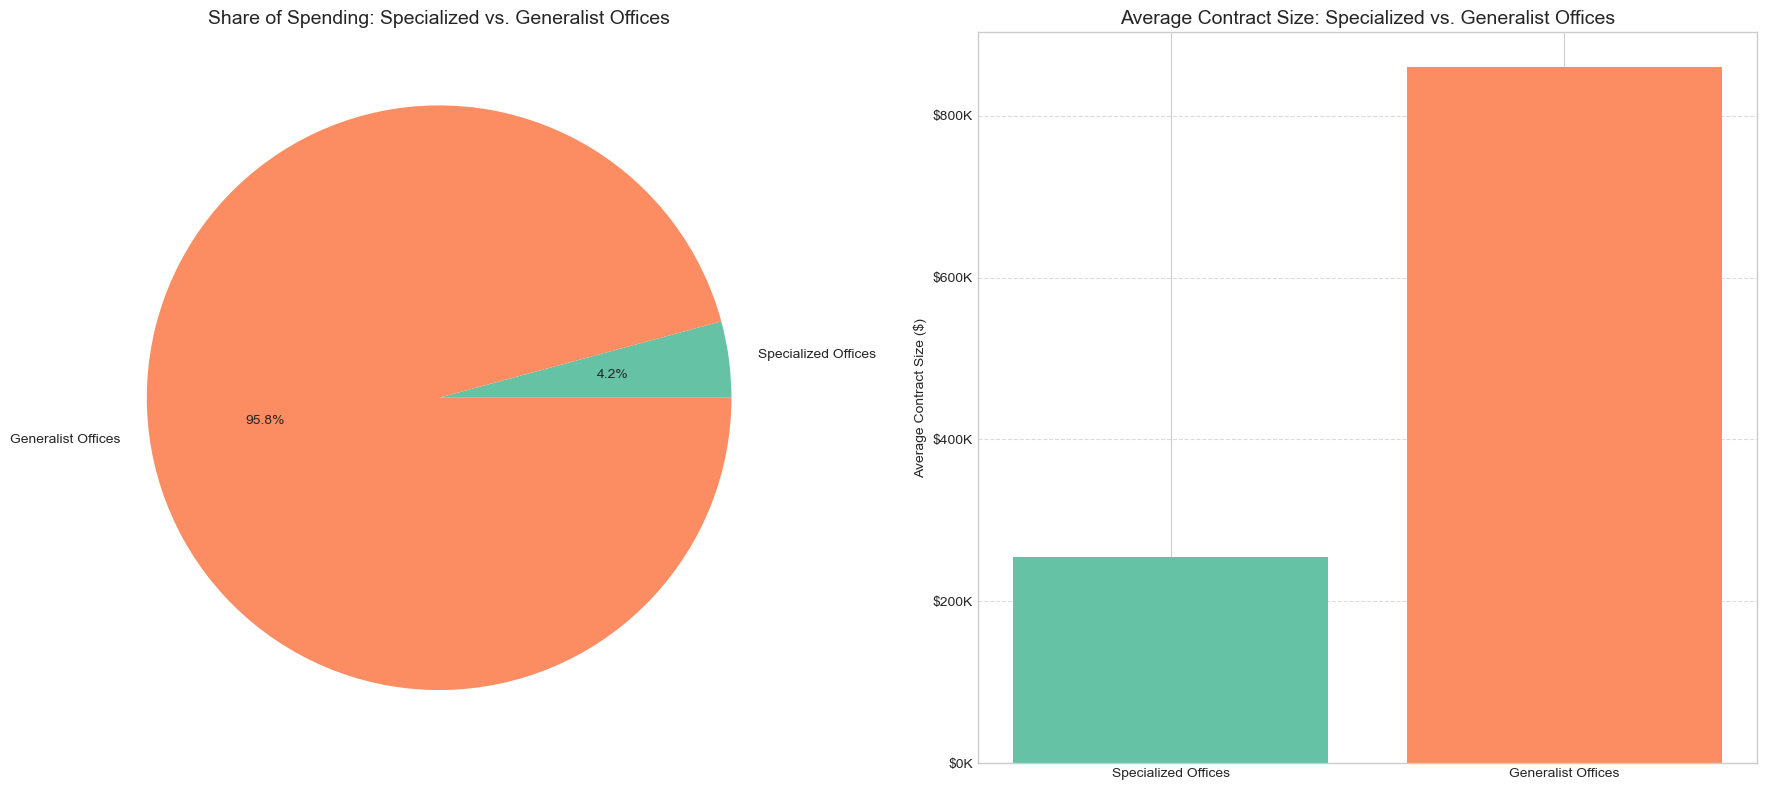


Contract modification rates by program:
Abrams: 96.84% of contracts have modifications
Bradley: 99.31% of contracts have modifications
Stryker: 98.04% of contracts have modifications


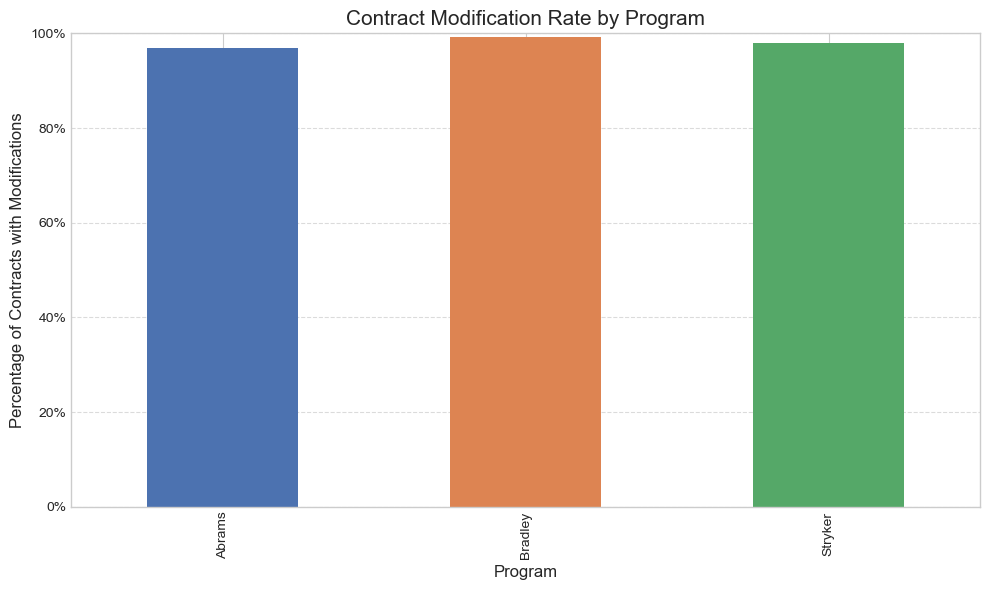

In [12]:
office_pivot_sorted, agency_pivot_sorted = utils.analyze_contracting_offices(program_df)
utils.visualize_contracting_offices(office_pivot_sorted)

office_metrics, office_program_specialist, office_program_generalist = utils.analyze_office_specialization(program_df)
utils.visualize_office_specialization(office_metrics)

modification_rate_by_program = utils.analyze_contract_modifications(program_df)
utils.visualize_contract_modifications(modification_rate_by_program, colors)

### 2.6 Summary of Exploratory Analysis

This section provides a comprehensive summary of the key metrics from our exploratory data analysis, creating a reference for the patterns we've observed in the dataset. The summary includes statistics about spending trends, vendor concentration, geographic distribution, and contracting office efficiency.

In [13]:
utils.generate_analysis_summary(df, program_df, total_by_program, market_concentration, 
                               cross_program_vendors, state_pivot_sorted, 
                               office_program_specialist, office_program_generalist,
                               modification_rate_by_program)

Summary of Ground Combat Systems Contract Analysis (FY2016, FY2017, FY2018, FY2019, FY2020, FY2021)

Total Spending: $9,155,214,150.45 ($9155.21M)
  - Abrams: $6,326,673,719.56 ($6326.67M, 69.1%)
  - Stryker: $1,945,848,555.83 ($1945.85M, 21.3%)
  - Bradley: $882,691,875.06 ($882.69M, 9.6%)

Vendor Concentration:
  - Abrams: 161 vendors, top 3 account for 0.8593280137746859
  - Bradley: 41 vendors, top 3 account for 0.9357661980108903
  - Stryker: 146 vendors, top 3 account for 0.9180499288435211

Vendors working across multiple programs: 34

Top 5 states by award amount:
  - MI: $6,538,926,007.38 ($6538.93M, 71.4%)
  - CA: $449,676,020.37 ($449.68M, 4.9%)
  - FL: $316,398,524.11 ($316.40M, 3.5%)
  - MO: $316,362,300.78 ($316.36M, 3.5%)
  - PA: $311,895,931.21 ($311.90M, 3.4%)

Contracting Office Analysis:
  - Specialized offices (one program): 165
  - Generalist offices (multiple programs): 32

Contract Modification Rates:
  - Abrams: 96.8%
  - Bradley: 99.3%
  - Stryker: 98.0%

Avera

## Phase 3: Advanced Analysis

Phase 3 focuses on deeper analytical techniques to examine technology acquisition patterns, program lifecycle assessment, and risk evaluation. These advanced analyses help identify potential contracting inefficiencies and future investment opportunities.

### 3.1 Technology and Product Analysis

This section categorizes contracts by Product Service Codes (PSC) and analyzes contract titles to identify key technologies and services acquired for each ground combat system program. This allows us to compare technology acquisition patterns and identify emerging trends.


### Technology and Product Analysis ###

PSC Diversity Metrics:
         PSC Count Top 5 PSC Share
Abrams       115.0          84.53%
Bradley       32.0          97.54%
Stryker      105.0          89.32%

Top 10 PSC codes for Abrams program:
psc_name
(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES, TRACKED                                                     $3,949,809,333.60
(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECHNICAL                                                          $627,717,982.87
(5855) NIGHT VISION EQUIPMENT, EMITTED AND REFLECTED RADIATION                                               $321,643,443.22
(AC41) R&D- DEFENSE SYSTEM: TANK/AUTOMOTIVE (BASIC RESEARCH)                                                 $233,500,962.23
(2520) VEHICULAR POWER TRANSMISSION COMPONENTS                                                               $215,036,099.48
(6625) ELECTRICAL AND ELECTRONIC PROPERTIES MEASURING AND TESTING INSTRUMENTS                                $104,439,553.6

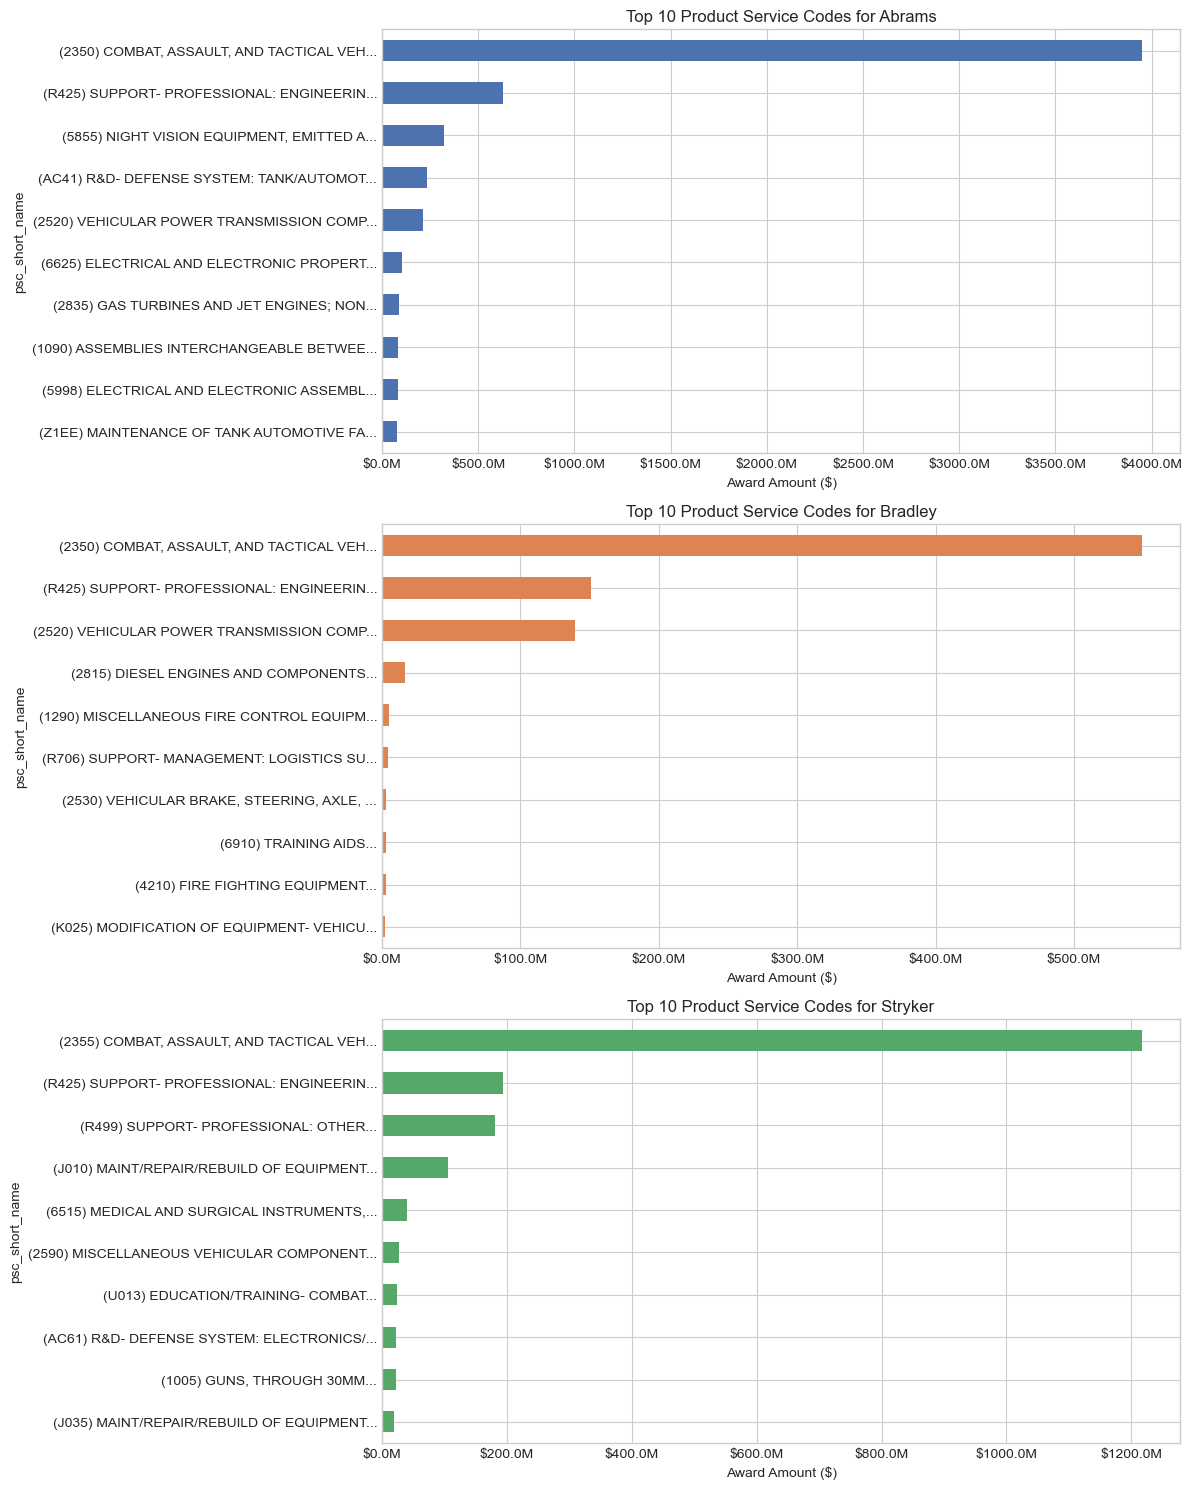

In [14]:
top_psc_by_program, psc_diversity, program_technologies, program_bigrams = utils.run_technology_analysis(program_df, colors)

### 3.2 Lifecycle Assessment

The lifecycle assessment determines where each ground combat system program is in its acquisition lifecycle. We correlate contract types with program lifecycle stages, project future acquisition needs based on historical patterns, and assess budget alignment with program requirements at each stage.


### Lifecycle Assessment ###

Program Lifecycle Assessment:
        Spend Trend Contract Size Trend Primary PSC Category  \
Abrams   Decreasing          Decreasing          Maintenance   
Bradley  Decreasing          Decreasing          Maintenance   
Stryker  Decreasing              Stable          Maintenance   

        Primary PSC Share                     Lifecycle Phase  
Abrams             70.85%  Late (Sustainment & Modernization)  
Bradley            99.86%  Late (Sustainment & Modernization)  
Stryker            91.47%  Late (Sustainment & Modernization)  

Future Acquisition Projections:
                                      Projected Trend  \
Abrams   Declining production, increasing maintenance   
Bradley  Declining production, increasing maintenance   
Stryker  Declining production, increasing maintenance   

                                Spending Outlook  \
Abrams   Gradual decrease with maintenance floor   
Bradley  Gradual decrease with maintenance floor   
Stryker 

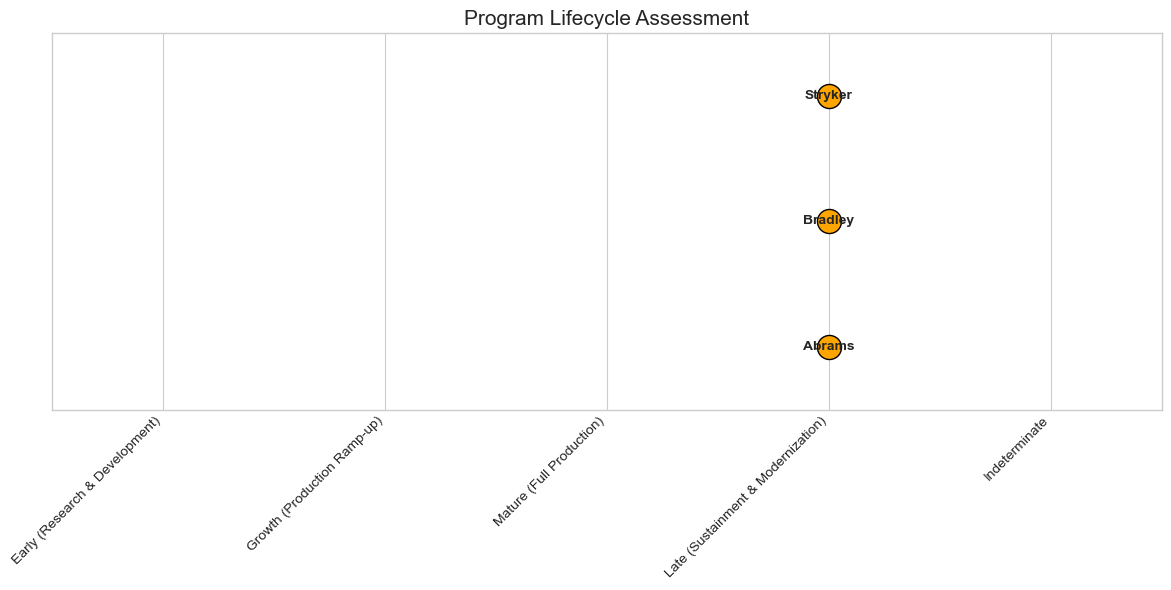

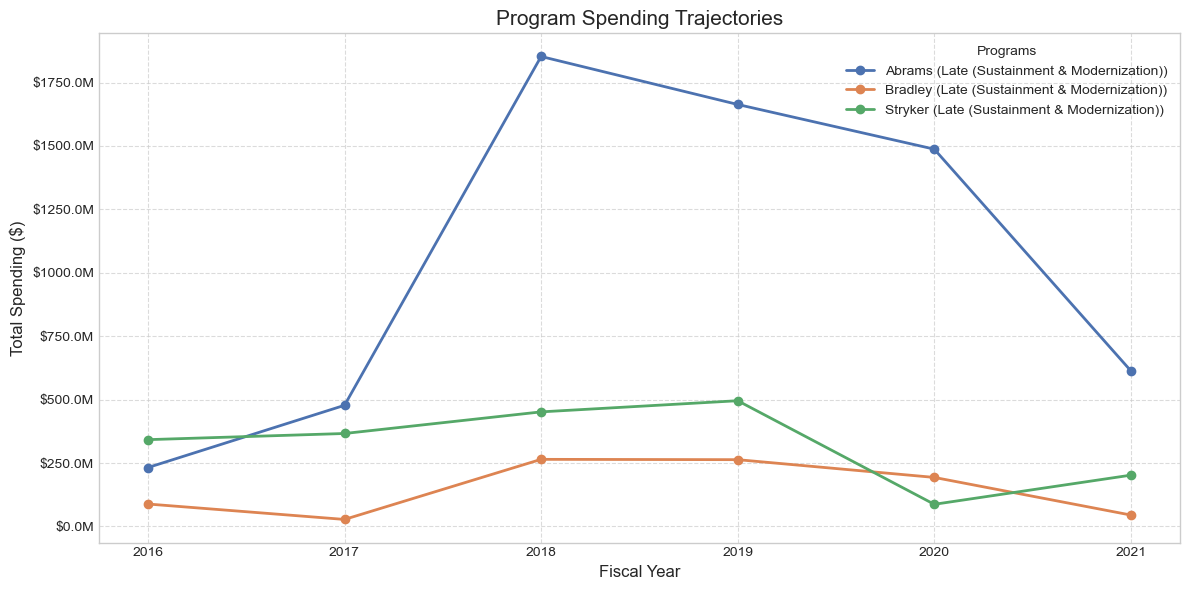

In [15]:
lifecycle_df, projection_df = utils.run_lifecycle_assessment(program_df)

### 3.3 Risk Analysis

The risk analysis section identifies potential vulnerabilities in the ground combat systems contracting landscape. We assess vendor dependencies, market concentration, budget consistency, and supply chain vulnerabilities to highlight areas requiring attention for program stability.


### Risk Analysis ###

Vendor Dependence Risk Analysis:
                            Top Vendor Top Vendor Share HHI Index  \
Stryker  general dynamics land systems           83.77%    0.7068   
Abrams   general dynamics land systems           77.31%    0.6038   
Bradley     bae systems land armaments           69.41%    0.5143   

        Significant Vendors Vendor Concentration Risk  \
Stryker                   4                 Very High   
Abrams                    7                 Very High   
Bradley                   5                      High   

             Market Structure Risk  
Stryker  Very High (Near Monopoly)  
Abrams   Very High (Near Monopoly)  
Bradley  Very High (Near Monopoly)  

Budget Consistency Risk Analysis:
        Year-to-Year Volatility Consistent Trend Has Significant Outliers  \
Stryker                  50.79%               No                      Yes   
Abrams                   94.61%               No                      Yes   
Bradley                

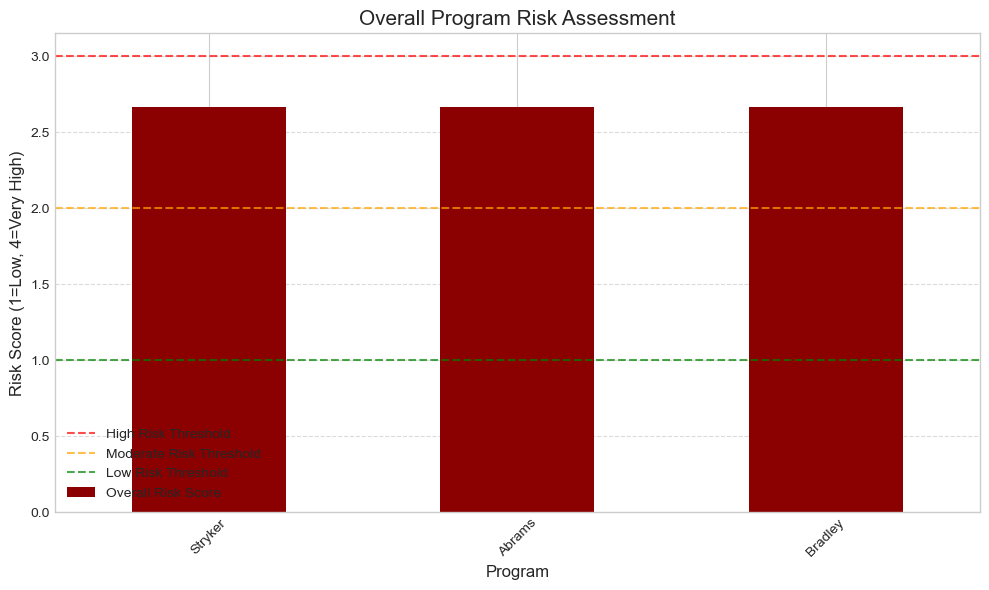

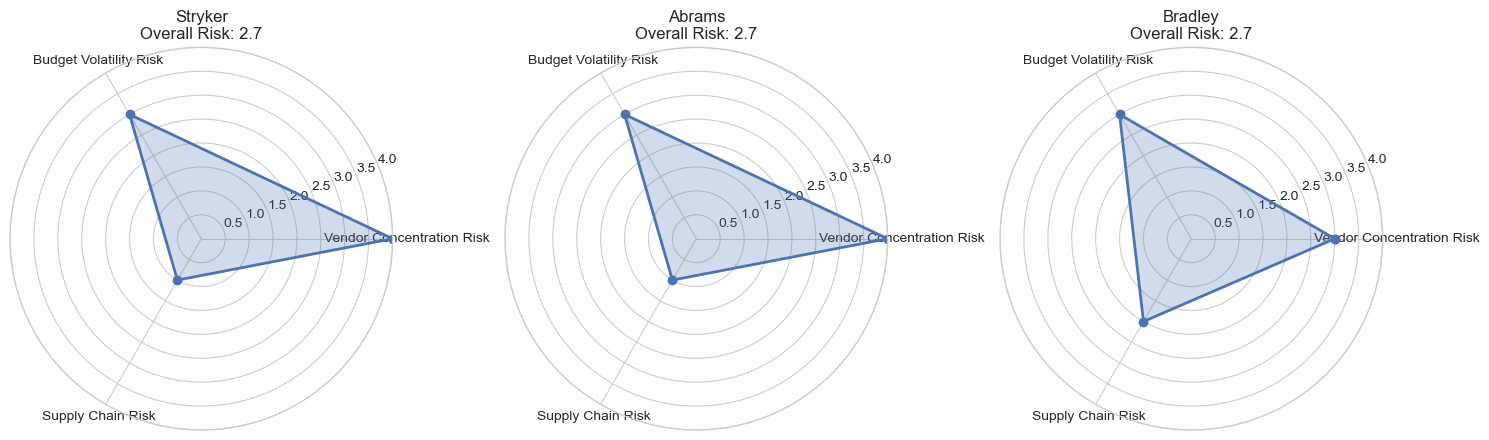

In [16]:
vendor_risk_df, budget_risk_df, supply_chain_df, consolidated_risk = utils.run_risk_analysis(program_df, market_concentration)